## Análisis Exploratorio 

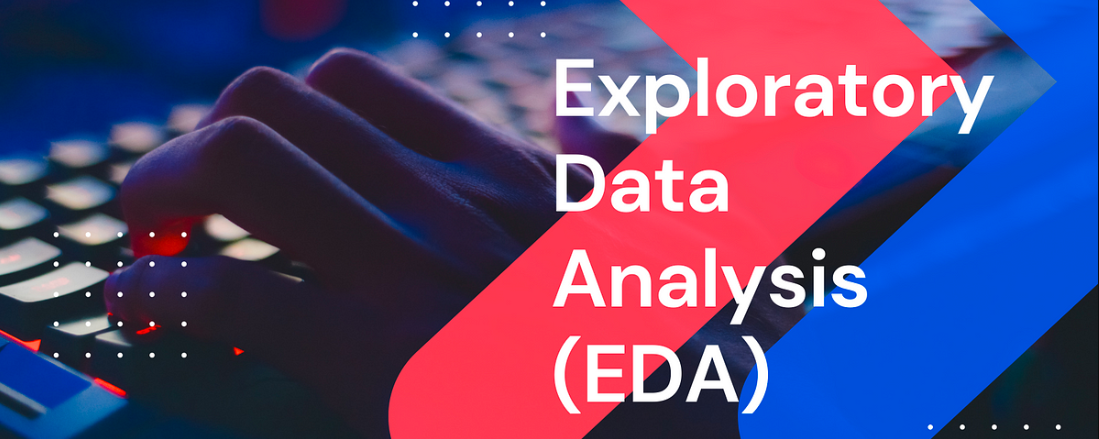
#### En este primer análisis inicial de los datos, me centraré en examinar la composición y el tamaño de los conjuntos de datos recibidos. El objetivo es identificar similitudes, unificar y estandarizar los datos para luego avanzar hacia su visualización. Examinaré columna por columna en busca de información relevante o duplicada, así como su formato, con el fin de obtener una comprensión más completa de los datos y poder desarrollar este proyecto de manera más efectiva.

In [264]:
# Importe las librerias necesarias
import numpy as np  # NumPy: computación científica
import pandas as pd  # Pandas: análisis de datos
import geopandas as gpd  # GeoPandas: datos geoespaciales
from shapely.geometry import Point  # Shapely: manipulaciones geométricas
import matplotlib.pyplot as plt  # Matplotlib: visualizaciones
from matplotlib.ticker import PercentFormatter  # Formateo de ejes en Matplotlib
import seaborn as sns  # Seaborn: visualización estadística
from scipy.stats import norm  # SciPy: cálculos numéricos
import warnings  # Manejo de advertencias
warnings.filterwarnings("ignore")  # Desactivar advertencias
pd.options.display.max_columns = None  # Mostrar todas las columnas


# Hoja 'HECHOS'

In [265]:
dfHomicidios = pd.ExcelFile("Datos/homicidios.xlsx") # Abrí el Excel que me suministraron y que está previamente guardado en la carpeta Datos
dfHechos = pd.read_excel(dfHomicidios, "HECHOS") # Leí la hoja llamada "HECHOS"


In [266]:
dfHechos.info() # Di un primer vistazo a los datos que contiene la hoja "HECHOS"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

## Dimensiones 

In [267]:
dfHechos.shape  # Observé la composición de la hoja "HECHOS"

(696, 21)

#### Los datos de la hoja de Excel denominada "HECHOS" constan de un total de 696 registros distribuidos en 21 columnas. Al realizar una primera inspección, se observa la presencia de valores nulos en algunas columnas. A continuación, procederé a verificarlas para confirmar esta observación.

## Conteo de nulos 

In [268]:
from herramientas import mostrarColumnasConNulos  # Importé la función para mostrar nulos del dataframe del archivo herramientas.py


In [269]:
mostrarColumnasConNulos(dfHechos) 

,columna,numeroDeNulos,porcentajeDeNulos
Calle,Calle,1,0.14%
Altura,Altura,567,81.47%
Cruce,Cruce,171,24.57%
Dirección Normalizada,Dirección Normalizada,8,1.15%


#### "Las columnas con la mayor cantidad de datos nulos son "Altura", con un 81.47% de valores faltantes (tipo de dato: Float64), seguida de "Cruce", con un 24.57% de valores faltantes (tipo de dato: Object). Por otro lado, las columnas "Calle" y "Dirección Normalizada" muestran un porcentaje mínimo de datos nulos, con un 0.14% y un 1.15%, respectivamente (ambas son de tipo Object).

## Conteo de duplicados 

In [270]:
contDuplicados = dfHechos.duplicated().sum()  # La variable contDuplicados almacena el número de filas duplicadas en el DataFrame dfHechos
contDuplicados

0


#### No se han identificado elementos duplicados en los datos, pero se han encontrado columnas que contienen información similar en diferentes formatos. Estas columnas pueden ser eliminadas sin afectar la integridad de los datos.

#### Específicamente, las columnas "AAAA", "MM" y "DD" contienen la misma información que la columna "FECHA", mientras que la columna "HH" se corresponde con la columna "HORA". Por otro lado, las columnas "Dirección Normalizada", "Calle" y "Cruce" presentan información redundante que ya está contenida en la columna "LUGAR_DEL_HECHO".

#### En cuanto a la columna "XY (CABA)", tras investigar el concepto de 'geocodificación plana' obtenido de la hoja DICCIONARIO_HECHOS, se ha concluido que los datos de latitud y longitud, los cuales están completos, podrían ser útiles para visualizaciones futuras utilizando la biblioteca GeoPandas.

#### Por último, la columna "Altura", definida como la 'altura de la arteria donde se produjo el hecho', no aporta información relevante para la geolocalización y además es la columna con más valores nulos.

A pesar de esto, todas estas columnas se almacenarán en el DataFrame "dfSimilares" por si se necesitan en el futuro. 

In [271]:
columnasSimilares= ["AAAA", "MM", "DD","FECHA", "HH","HORA","Dirección Normalizada", "Calle", "Altura", "Cruce","LUGAR_DEL_HECHO", "XY (CABA)"]
dfSimilaresHechos = dfHechos[columnasSimilares]
dfSimilaresHechos.head()

,AAAA,MM,DD,FECHA,HH,HORA,Dirección Normalizada,Calle,Altura,Cruce,LUGAR_DEL_HECHO,XY (CABA)
0,2016,1,1,2016-01-01,4,04:00:00,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,Point (98896.78238426 93532.43437792)
1,2016,1,2,2016-01-02,1,01:15:00,"PAZ, GRAL. AV. y DE LOS CORRALES AV.","PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,AV GRAL PAZ Y AV DE LOS CORRALES,Point (95832.05571093 95505.41641999)
2,2016,1,3,2016-01-03,7,07:00:00,ENTRE RIOS AV. 2034,ENTRE RIOS AV.,2034.0,NaN,AV ENTRE RIOS 2034,Point (106684.29090040 99706.57687843)
3,2016,1,10,2016-01-10,0,00:00:00,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.",AV LARRAZABAL Y GRAL VILLEGAS CONRADO,Point (99840.65224780 94269.16534422)
4,2016,1,21,2016-01-21,5,05:20:00,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.",AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,Point (106980.32827929 100752.16915795)


## Outliers

#### En este punto, me centré en buscar datos atípicos que podrían afectar mi análisis. Utilicé técnicas como la visualización de boxplots, el cálculo de estadísticas descriptivas y la identificación de valores extremos en diferentes variables para detectar cualquier anomalía en los datos.

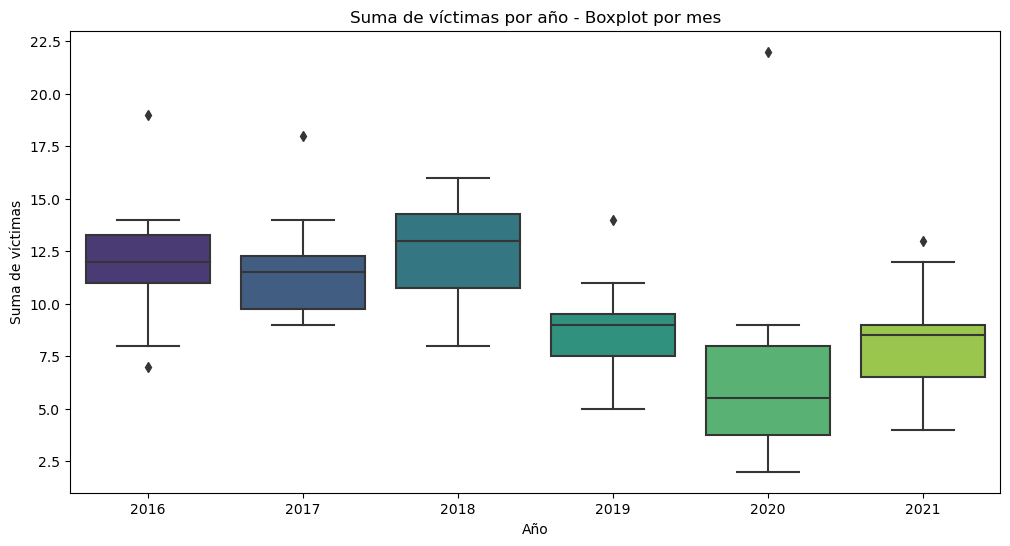

In [272]:
# Configuré la paleta de colores
sns.set_palette("viridis")

# Calculé la suma de víctimas por año y mes
sumaVictimas = dfHechos.groupby(['AAAA', 'MM'])['N_VICTIMAS'].sum().reset_index()

# Configuré el tamaño de la figura
plt.figure(figsize=(12, 6))  # Ajusté el tamaño según fue necesario

# Creé el gráfico de caja y bigotes para cada año
sns.boxplot(x='AAAA', y='N_VICTIMAS', data=sumaVictimas)

# Añadí etiquetas para outliers
for año, datos in sumaVictimas.groupby('AAAA'):
    Q1 = datos['N_VICTIMAS'].quantile(0.25)
    Q3 = datos['N_VICTIMAS'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = datos[(datos['N_VICTIMAS'] < Q1 - 1.5 * IQR) | (datos['N_VICTIMAS'] > Q3 + 1.5 * IQR)]
    for i, fila in outliers.iterrows():
        plt.annotate(f"{fila['N_VICTIMAS']}", xy=(fila['AAAA'], fila['N_VICTIMAS']), xytext=(-15, 10), textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))

# Puse título y etiquetas de ejes
plt.title('Suma de víctimas por año - Boxplot por mes')
plt.xlabel('Año')
plt.ylabel('Suma de víctimas')

# Mostré el gráfico
plt.show()


Logré analizar desde la gráfica que, a pesar de que el año 2020, marcado por la pandemia, registró en general una cantidad menor de homicidios por siniestros viales en comparación con otros años, aún presenta algunos meses con picos altos de víctimas, que se destacan como outliers en el gráfico de caja y bigotes. Esto sugiere que, aunque en términos generales la cantidad de víctimas puede ser menor, existen períodos específicos dentro del año en los que la incidencia de siniestros viales y sus consecuencias es notablemente mayor o podría tratarse de datos mal suministrados; aun así, trataré de manejar ambas hipótesis.

Para abordar la primera, se pueden considerar las siguientes acciones:

1. **Análisis de los factores**: Investigar los factores que contribuyeron a los picos de siniestralidad vial en esos meses específicos del año 2020. Podrían incluir eventos especiales, cambios en el comportamiento de los conductores debido a la pandemia, condiciones climáticas, entre otros.

2. **Implementación de medidas preventivas**: Basándose en el análisis de los factores contribuyentes, se pueden diseñar e implementar medidas preventivas específicas para reducir la incidencia de siniestros viales durante los meses críticos. Estas medidas podrían incluir campañas de concientización, aumento de la vigilancia policial, mejoras en la infraestructura vial, entre otras.

3. **Educación vial**: Reforzar programas de educación vial dirigidos a conductores, peatones y ciclistas, con énfasis en los comportamientos seguros en la vía pública. Esto podría ayudar a crear una cultura vial más segura y reducir la ocurrencia de accidentes.

4. **Monitoreo continuo**: Establecer un sistema de monitoreo continuo de la siniestralidad vial, que permita identificar tendencias y patrones emergentes en tiempo real. Esto facilitaría la implementación oportuna de medidas correctivas y la evaluación de la efectividad de las acciones tomadas.

5. **Coordinación interinstitucional**: Fomentar la colaboración entre instituciones gubernamentales, organizaciones de la sociedad civil y el sector privado para abordar de manera integral y coordinada la problemática de los siniestros viales. Esto podría involucrar la creación de comités intersectoriales de seguridad vial y la asignación de recursos adecuados para la implementación de políticas y programas.

#### En resumen, abordar la problemática de los picos de siniestralidad vial durante ciertos meses del año 2020 requiere un enfoque multidimensional que combine el análisis de factores específicos, la implementación de medidas preventivas, la educación vial, el monitoreo continuo y la coordinación interinstitucional. En el desarrollo del análisis, espero resolver cuál camino tomar para tratar estos datos.


## Reduccion del tamaño 

#### En este punto despues de mirar composiscion, contar nulos, duplicados y analizar Otliers cuantitativos con relacion año y cantidad de victimas , estoy en la capacidad de eliminar lo que considero no voy a necesitar en mi analisis.

In [273]:
# Después de guardar los datos por si los llegase a necesitar más adelante, procedo a eliminar las columnas previamente justificadas.
dfHechos = dfHechos.drop(columns=["AAAA", "MM", "DD", "HH", "Dirección Normalizada", "Calle", "Altura", "Cruce", "XY (CABA)"])

In [274]:
dfHechos.info() # Visualicé nuevamente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               696 non-null    object        
 1   N_VICTIMAS       696 non-null    int64         
 2   FECHA            696 non-null    datetime64[ns]
 3   HORA             696 non-null    object        
 4   LUGAR_DEL_HECHO  696 non-null    object        
 5   TIPO_DE_CALLE    696 non-null    object        
 6   COMUNA           696 non-null    int64         
 7   pos x            696 non-null    object        
 8   pos y            696 non-null    object        
 9   PARTICIPANTES    696 non-null    object        
 10  VICTIMA          696 non-null    object        
 11  ACUSADO          696 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 65.4+ KB


# Hoja 'VICTIMAS'

#### Aquí se debe tratar la información con cuidado, especialmente todas las columnas con variables cualitativas que proporcionarán información clara y precisa sobre la población más involucrada en este tipo de siniestros, así como las cuantitativas como el mes para abordar los outliers previamente mencionados del 2020 y la edad para identificar rangos etarios donde se deben realizar más campañas de concientización.

In [275]:
# Leí el archivo de Excel que contenía la información de las víctimas y cargué los datos en el DataFrame dfVictimas
dfVictimas = pd.read_excel(dfHomicidios, "VICTIMAS")
dfVictimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [276]:
# Visualicé la información del DataFrame dfVictimas
dfVictimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


## Conteo de Nulos 

In [277]:
# Importé la función mostrarColumnasConNulos desde el archivo herramientas.py
from herramientas import mostrarColumnasConNulos

In [278]:
# Utilicé la función mostrarColumnasConNulos para mostrar las columnas con valores nulos en el DataFrame dfVictimas
mostrarColumnasConNulos(dfVictimas)

,columna,numeroDeNulos,porcentajeDeNulos


### No hay nulos 

## Conteo Duplicados 

In [279]:
# Calculé el número de filas duplicadas en el DataFrame dfVictimas y lo asigné a la variable contDuplicados
contDuplicados = dfVictimas.duplicated().sum()

# Imprimí el número de filas duplicadas
contDuplicados


0

### No hay duplicados

#### Al igual que en la hoja 'HECHOS', identifico columnas cuya información, aunque está en un formato diferente, está repetida. Esto es aún más relevante considerando que mi objetivo es unificar las hojas 'HECHOS' y 'VICTIMAS'.

In [280]:
# Eliminé las columnas "MM", "DD" y "FECHA" del DataFrame dfVictimas
dfVictimas = dfVictimas.drop(columns=["MM", "DD", "FECHA"])

In [281]:
# Visualicé la información actualizada del DataFrame dfVictimas después de eliminar columnas
dfVictimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_hecho             717 non-null    object
 1   AAAA                 717 non-null    int64 
 2   ROL                  717 non-null    object
 3   VICTIMA              717 non-null    object
 4   SEXO                 717 non-null    object
 5   EDAD                 717 non-null    object
 6   FECHA_FALLECIMIENTO  717 non-null    object
dtypes: int64(1), object(6)
memory usage: 39.3+ KB


In [282]:
dfVictimas

,ID_hecho,AAAA,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...
712,2021-0092,2021,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


## Outliers 

#### Considero que este dataframe dfVictimas no tiene las columnas suficientes para identificar outliers. En particular, la ausencia de la columna 'N_VICTIMAS' me lleva a decidir manejar los outliers de esta hoja después de realizar la unificación.

## Unificación de las hojas 'HECHOS' Y 'VICTIMAS' 
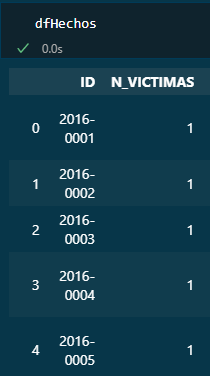
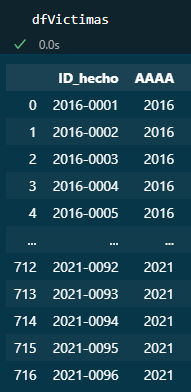

La columna "ID" de la hoja "HECHOS" coincide con la columna "ID_hecho" de la hoja "VICTIMAS". Estos datos me sirvieron como punto de referencia para la unificación de los datos.

In [283]:
# Realicé una fusión entre los DataFrames dfHechos y dfVictimas utilizando como clave de fusión las columnas "ID" en dfHechos y "ID_hecho" en dfVictimas
dfConsolidadoAccidentes = pd.merge(dfHechos, dfVictimas, left_on="ID", right_on="ID_hecho")

In [284]:
# Mostré las primeras 3 filas del DataFrame dfConsolidadoAccidentes después de fusionar los DataFrames dfHechos y dfVictimas
dfConsolidadoAccidentes.head(2)

,ID,N_VICTIMAS,FECHA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA_x,ACUSADO,ID_hecho,AAAA,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,04:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,2016-0001,2016,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,01:15:00,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,2016-0002,2016,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00


#### Con las dos hojas unificadas analicé el contenido de las columnas. Asigné el valor nulo a los datos que tienen el valor 'SD' (Sin Dato) en la columna FECHA_FALLECIMIENTO y 'SD-SD' en la columna PARTICIPANTES. Esto se hizo para facilitar el tratamiento y evitar que afecten los pasos siguientes del análisis. Es posible que se necesite volver a tratar estas columnas en el futuro según evolucione el análisis.

In [285]:
# Importé la función imputarSD desde el archivo herramientas.py
from herramientas import imputarSD


In [286]:
# Importé la función imputarSDSD desde el archivo herramientas.py
from herramientas import imputarSDSD

In [287]:
# Utilicé la función imputarSD para asignar valores nulos a los datos que tienen el valor 'SD' en la columna FECHA_FALLECIMIENTO del DataFrame dfConsolidadoAccidentes
imputarSD(dfConsolidadoAccidentes)

# Utilicé la función imputarSDSD para asignar valores nulos a los datos que tienen el valor 'SD-SD' en la columna PARTICIPANTES del DataFrame dfConsolidadoAccidentes
imputarSDSD(dfConsolidadoAccidentes)

,ID,N_VICTIMAS,FECHA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA_x,ACUSADO,ID_hecho,AAAA,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,04:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,2016-0001,2016,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,01:15:00,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,2016-0002,2016,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,07:00:00,AV ENTRE RIOS 2034,AVENIDA,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,2016-0003,2016,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,00:00:00,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,8,-58.46503904,-34.68092974,MOTO-SD,MOTO,NaT,2016-0004,2016,CONDUCTOR,MOTO,MASCULINO,18,NaT
4,2016-0005,1,2016-01-21,05:20:00,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,2016-0005,2016,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,17:10:00,AV. RIESTRA Y MOM,AVENIDA,7,-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,2021-0093,2021,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
713,2021-0094,1,2021-12-20,01:10:00,AU DELLEPIANE Y LACARRA,AUTOPISTA,9,-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,2021-0094,2021,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
714,2021-0095,1,2021-12-30,00:43:00,AV. GAONA Y TERRADA,AVENIDA,11,-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,2021-0095,2021,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00
715,2021-0096,1,2021-12-15,10:30:00,AV. EVA PERON 4071,AVENIDA,9,-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,2021-0096,2021,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20 00:00:00


In [288]:
# Visualicé la información actualizada del DataFrame dfConsolidadoAccidentes después de imputar valores nulos
dfConsolidadoAccidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   717 non-null    object        
 1   N_VICTIMAS           717 non-null    int64         
 2   FECHA                717 non-null    datetime64[ns]
 3   HORA                 716 non-null    object        
 4   LUGAR_DEL_HECHO      716 non-null    object        
 5   TIPO_DE_CALLE        717 non-null    object        
 6   COMUNA               717 non-null    int64         
 7   pos x                717 non-null    object        
 8   pos y                717 non-null    object        
 9   PARTICIPANTES        712 non-null    object        
 10  VICTIMA_x            708 non-null    object        
 11  ACUSADO              694 non-null    object        
 12  ID_hecho             717 non-null    object        
 13  AAAA                 717 non-null  

In [289]:
# Utilicé la función mostrarColumnasConNulos para mostrar las columnas con valores nulos en el DataFrame dfConsolidadoAccidentes
mostrarColumnasConNulos(dfConsolidadoAccidentes)

,columna,numeroDeNulos,porcentajeDeNulos
HORA,HORA,1,0.14%
LUGAR_DEL_HECHO,LUGAR_DEL_HECHO,1,0.14%
PARTICIPANTES,PARTICIPANTES,5,0.7%
VICTIMA_x,VICTIMA_x,9,1.26%
ACUSADO,ACUSADO,23,3.21%
ROL,ROL,11,1.53%
VICTIMA_y,VICTIMA_y,9,1.26%
SEXO,SEXO,6,0.84%
EDAD,EDAD,53,7.39%
FECHA_FALLECIMIENTO,FECHA_FALLECIMIENTO,68,9.48%


#### El siguiente paso es realizar la normalización columna por columna. Eliminaré las columnas que representen un porcentaje mínimo en algunas, mientras que en otras les daré otro tipo de tratamiento según sea el caso.

In [290]:
# Eliminé las filas con valores NaN en la columna "HORA" del DataFrame dfConsolidadoAccidentes. Esto es importante para asegurar que los datos estén limpios y puedan ser utilizados adecuadamente en el análisis. (0.14%)
dfConsolidadoAccidentes = dfConsolidadoAccidentes.dropna(subset=["HORA"])

In [291]:
# Corregí problemas de formato en la columna "HORA"
# Convertí la columna "HORA" a formato datetime, corrigiendo los errores y convirtiendo el formato a HH:MM:SS
formatoHora = pd.to_datetime(dfConsolidadoAccidentes["HORA"], errors="coerce").isnull()
dfConsolidadoAccidentes.loc[~formatoHora, "HORA"] = pd.to_datetime(dfConsolidadoAccidentes.loc[~formatoHora, "HORA"]).dt.strftime('%H:%M:%S')

In [292]:
# Eliminé las filas que contienen valores nulos en la columna "LUGAR_DEL_HECHO" (0.14%)
dfConsolidadoAccidentes = dfConsolidadoAccidentes.dropna(subset=["LUGAR_DEL_HECHO"])

In [293]:
# Reemplacé las comas por espacios vacíos en la columna "LUGAR_DEL_HECHO" para después reorganizarlas
dfConsolidadoAccidentes["LUGAR_DEL_HECHO"] = dfConsolidadoAccidentes["LUGAR_DEL_HECHO"].str.replace(',', '')

In [294]:
# Importé la función direccionstandar desde el archivo herramientas.py
from herramientas import direccionstandar

In [295]:
# Utilicé la función direccionstandar para reorganizar la estructura de los valores de la columna "LUGAR_DEL_HECHO" 
dfConsolidadoAccidentes["LUGAR_DEL_HECHO"] = dfConsolidadoAccidentes["LUGAR_DEL_HECHO"].apply(direccionstandar)

In [296]:
# Eliminé las filas que contienen valores nulos en la columna "PARTICIPANTES" (0.7)
dfConsolidadoAccidentes = dfConsolidadoAccidentes.dropna(subset=["PARTICIPANTES"])

In [297]:
# Reemplacé los valores nulos en la columna "VICTIMA_x" con "No identificado" (1.26%)
dfConsolidadoAccidentes["VICTIMA_x"].fillna("No identificado", inplace=True)

In [298]:
# Reemplacé los valores nulos en la columna "ACUSADO" con "No identificado" (3.21%)
dfConsolidadoAccidentes["ACUSADO"].fillna("No identificado", inplace=True)

In [299]:
# Reemplacé los valores nulos en la columna "ROL" con "No identificado" (1.53%)
dfConsolidadoAccidentes["ROL"].fillna("No identificado", inplace=True)

In [300]:
# Reemplacé los valores nulos en la columna "VICTIMA_y" con "No identificado" (1.26%) Probablemente se eliminara más adelante 
dfConsolidadoAccidentes["VICTIMA_y"].fillna("No identificado", inplace=True)

In [301]:
# Rellené los valores nulos en la columna "SEXO" con "No especificado" (0.84%)
dfConsolidadoAccidentes["SEXO"].fillna("No especificado", inplace=True)

In [302]:
# Convertí la columna "EDAD" a tipo numérico, tratando los errores como valores nulos
dfConsolidadoAccidentes["EDAD"] = pd.to_numeric(dfConsolidadoAccidentes["EDAD"], errors="coerce")

In [303]:
# Calculé la media de la columna "EDAD", excluyendo los valores nulos 
mediaEdad = dfConsolidadoAccidentes["EDAD"].dropna().mean()

In [304]:
# Imputé los valores nulos en la columna "EDAD" con la media calculada anteriormente
dfConsolidadoAccidentes["EDAD"].fillna(mediaEdad, inplace=True)

In [305]:
# Convertí la columna "EDAD" a tipo entero
dfConsolidadoAccidentes["EDAD"] = dfConsolidadoAccidentes["EDAD"].astype(int)

In [306]:
# Definí los límites de los rangos etarios y las etiquetas correspondientes
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, float("inf")]
labels = ["menos de 10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80","81-90", "más de 90"]

In [307]:
# Utilicé pd.cut para crear los rangos y asignar etiquetas a la columna "EDAD"
dfConsolidadoAccidentes["EDAD"] = pd.cut(dfConsolidadoAccidentes["EDAD"], bins=bins, labels=labels, right=False)

In [308]:
# Cambié los formatos a fecha estándar en la columna "FECHA_FALLECIMIENTO"
dfConsolidadoAccidentes["FECHA_FALLECIMIENTO"] = pd.to_datetime(dfConsolidadoAccidentes["FECHA_FALLECIMIENTO"], format="%Y-%m-%d %H:%M:%S", errors="coerce")
dfConsolidadoAccidentes["FECHA_FALLECIMIENTO"] = dfConsolidadoAccidentes["FECHA_FALLECIMIENTO"].dt.strftime("%Y-%m-%d")

In [309]:
# Rellené los valores nulos de la columna "FECHA_FALLECIMIENTO" con los valores de la columna "FECHA", asumiendo que fallecieron en el lugar del accidente
dfConsolidadoAccidentes["FECHA_FALLECIMIENTO"].fillna(dfConsolidadoAccidentes["FECHA"], inplace=True)

In [310]:
# Segmenté por semestre con el fin de ir perfilando la data que permitirá cumplir el siguiente KPI: "Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior."
dfConsolidadoAccidentes["SEMESTRE"] = [1 if month <= 6 else 2 for month in dfConsolidadoAccidentes["FECHA"].dt.month]

In [311]:
# Renombré la columna 'AAAA' a 'AÑO' y convertí la columna 'AÑO' a tipo de dato entero
dfConsolidadoAccidentes = dfConsolidadoAccidentes.rename(columns={"AAAA": "AÑO"}).astype({"AÑO": int})

In [312]:
# Eliminé la columna "ID_hecho" utilizada previamente para fusionar los DataFrames
dfConsolidadoAccidentes = dfConsolidadoAccidentes.drop(columns=["ID_hecho"])

In [313]:
# Eliminé la columna "VICTIMA_y", que contiene los mismos datos que "VICTIMA_x". Esta columna se creó como parte del proceso de unificación.
dfConsolidadoAccidentes.drop(columns=['VICTIMA_y'], inplace=True)

In [314]:
dfConsolidadoAccidentes.head(2)

,ID,N_VICTIMAS,FECHA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA_x,ACUSADO,AÑO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,SEMESTRE
0,2016-0001,1,2016-01-01,04:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,2016,CONDUCTOR,MASCULINO,11-20,2016-01-01,1
1,2016-0002,1,2016-01-02,01:15:00,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,2016,CONDUCTOR,MASCULINO,71-80,2016-01-02,1


#### Hasta el momento, tengo un conjunto de datos unificado, normalizado y 'limpio', lo que me permite visualizar los principales insights que pudiese descubrir. Si es necesario, puedo continuar con la normalización de los datos.

## Accidentes por año para la Ciudad Autonoma de Buenos Aires (CABA)

#### Desde el analisis inicial de box plot sé que debo prestar atención al año 2020 asi que empecé analizando victimas por año.

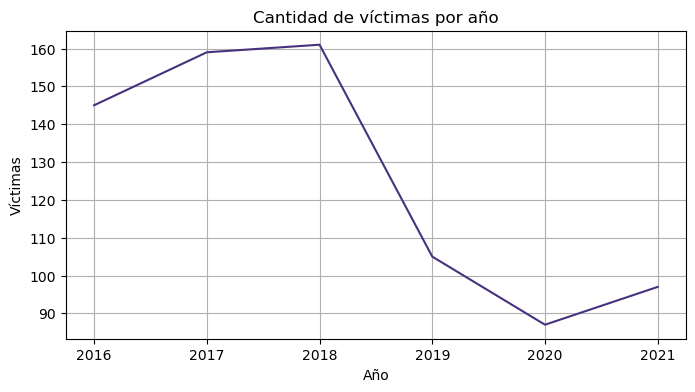

In [315]:
# Extraje el año de la fecha
dfConsolidadoAccidentes["AÑO"] = dfConsolidadoAccidentes["FECHA"].dt.year
# Agrupé por año y sumé la cantidad de víctimas
grouped = dfConsolidadoAccidentes.groupby("AÑO")["N_VICTIMAS"].sum()

# Creé el gráfico de líneas utilizando la paleta de colores "viridis"
plt.figure(figsize=(8, 4))
sns.lineplot(x=grouped.index, y=grouped.values, palette="viridis")
plt.xlabel("Año")
plt.ylabel("Víctimas")
plt.title("Cantidad de víctimas por año")
plt.grid()
plt.show()


#### Las grafica comfirman el comportamiento a la baja de el año 2020 de manera significativa, pero el verdadero cambio se da en el periodo 2018- 2019 aqui hay bastante por analizar.

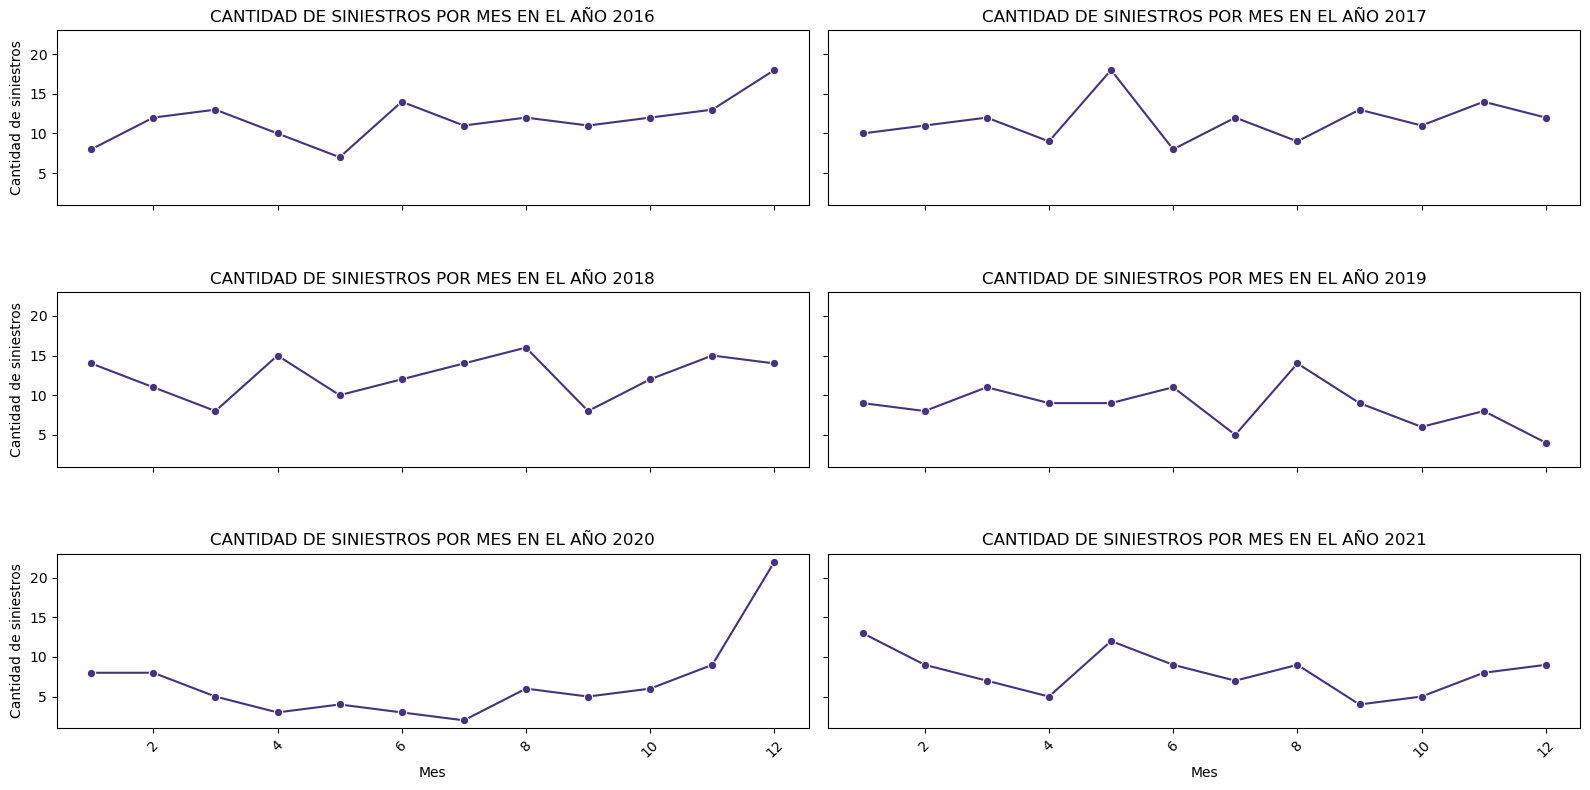

In [316]:

# Defini los años disponibles y el orden de los meses
años = dfConsolidadoAccidentes["AÑO"].unique()
orden_meses = range(1, 13)

# Configuré el tamaño de la figura y comparte ejes
fig, axes = plt.subplots(3, 2, figsize=(16, 8), sharex=True, sharey=True)

# Itere sobre los años
for i, año in enumerate(años):

    # Filtre los datos por año
    datos_año = dfConsolidadoAccidentes[dfConsolidadoAccidentes['AÑO'] == año]

    # Calcule los siniestros por mes y rellena los meses faltantes
    siniestros_por_mes = datos_año['FECHA'].dt.month.value_counts().reindex(orden_meses)

    # Grafica el número de siniestros por mes
    sns.lineplot(x=siniestros_por_mes.index, y=siniestros_por_mes.values, marker='o', ax=axes[i // 2, i % 2], palette="viridis")
    axes[i // 2, i % 2].set_title(f'CANTIDAD DE SINIESTROS POR MES EN EL AÑO {año}')
    axes[i // 2, i % 2].set_xlabel('Mes')
    axes[i // 2, i % 2].set_ylabel('Cantidad de siniestros')
    axes[i // 2, i % 2].tick_params(axis='x', rotation=45)

# Ajuste el espaciado y muestra la figura
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

# Ignore las advertencias sobre el uso de infinitos como NaN
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")




#### Puedo concluir que para el año 2016 en la Ciudad Autónoma de Buenos Aires (CABA), capital de la República Argentina, fallecieron 149 personas.

Dato que pude verificar segun informe presentado por el ministerio de transporte Presidencia de la Nación https://www.argentina.gob.ar/sites/default/files/informe_estadistico_2016_-_version_2.pdf


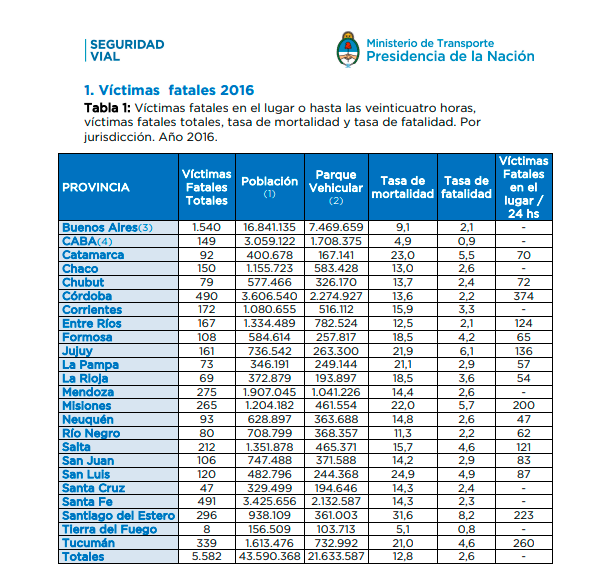

#### A raíz de esta confirmación, considero muy importante la necesidad de conseguir más datos para contrastar los ya obtenidos y enriquecer el análisis; este proceso de extracción de datos de una fuente oficial, transformación y carga para posterior unificación lo llevaré a cabo en el ETL.ipynb.

#### No puedo seguir sin antes mencionar un dato que me llamó mucho la atención, y cito: "Hasta 2016, el OMSV se basó en la información provista por la Dirección General de Comisarías (DGC) de la Policía Federal Argentina (PFA), base que abarca el período 2010-2016. En el año 2017, comenzó a operar la Policía de la Ciudad, dependiente del Ministerio de Justicia y Seguridad del GCBA (MJyS), fuerza que reunió a las dependencias de la PFA (entre ellas la DGC) junto con las de la Policía Metropolitana (autopistas, comunas, etc.). La Policía de la Ciudad cubrió así la totalidad del territorio e integró la información que hasta entonces recopilaban las fuerzas de manera independiente. En virtud de ello, a partir del segundo cuatrimestre de 2018, la principal fuente de información sobre siniestros viales con la que trabaja el Observatorio es la del MJyS, fuente que permite conocer una mayor cantidad de casos por cubrir la totalidad del territorio de la Ciudad y podría ser una causalidad de la variación tan fuerte que se ven las cifras en el 2018". Informe de víctimas fatales 2018.

#### Las otras conclusiones es que desde el año 2016 a 2018 hubo un incremento de 12 victimas, dato que seria bueno contrastar con el incremento poblacional.

#### Desde principios de 2018 hasta principios de 2020, hubo una reducción de 162 víctimas a 79, lo que representa una disminución significativa. Es importante tener en cuenta que la pandemia de COVID-19 fue declarada a principios de marzo de 2020.

## Rangos Etarios

####  Despues de evaluar la cantidad de fallecidos por año, considere de mucha importancia saber el rango de edad de las victimas fatales.


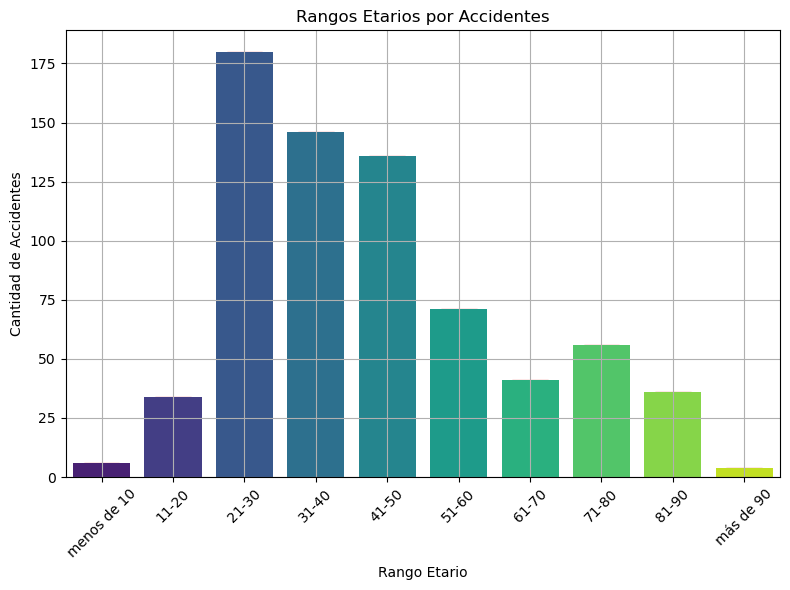

In [317]:
# Calculé la accidentalidad por rango etario y ordené los valores
accidentalidadPorRangoEtario = dfConsolidadoAccidentes["EDAD"].value_counts().sort_index()

# Grafiqué los rangos etarios por accidentes
plt.figure(figsize=(8, 6))
accidentalidadPorRangoEtario.plot(kind="bar", edgecolor="lightcoral", color="lightblue")
plt.xlabel("Rango Etario")
plt.ylabel("Cantidad de Accidentes")
plt.title("Rangos Etarios por Accidentes")
colores = sns.color_palette("viridis", len(accidentalidadPorRangoEtario))
plt.bar(accidentalidadPorRangoEtario.index, accidentalidadPorRangoEtario.values, color=colores)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()


#### El rango de edad de 21 a 40 años es el que más víctimas fatales aporta, con alrededor de 350 personas, seguido del rango de 41 a 60 años, con alrededor de 210 víctimas. Entre los 21 y los 60 años, estos rangos de edad aportan el 70% del total de las víctimas fatales.

#### Estos datos van a ser fundamentales al momento de de generar información que le permita a las autoridades locales tomar medidas para disminuir la cantidad de víctimas fatales de los siniestros viales el cual es el principal objetivo de este análisis.

## Victimas  por genero

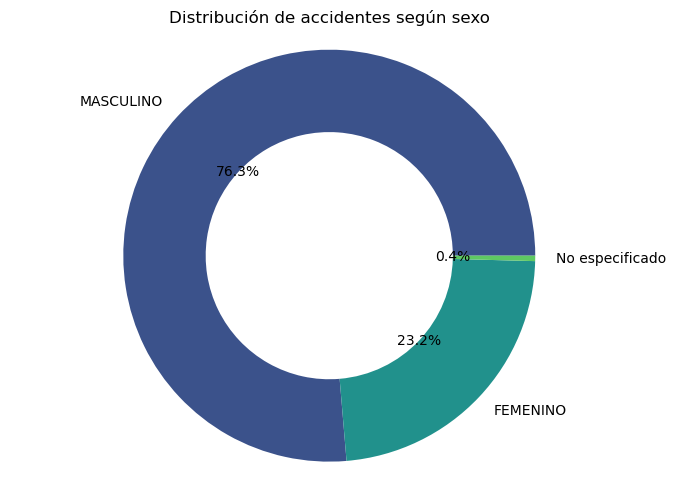

SEXO
MASCULINO          542
FEMENINO           165
No especificado      3
Name: count, dtype: int64

In [318]:
# Calculé el conteo de víctimas por género
victimasPorGenero = dfConsolidadoAccidentes["SEXO"].value_counts()

# Creé el gráfico de pastel para la distribución de accidentes según el sexo con la paleta de colores "viridis"
plt.figure(figsize=(7, 5))
colores = sns.color_palette("viridis", len(victimasPorGenero))
pie_chart = victimasPorGenero.plot(kind="pie", autopct='%1.1f%%', colors=colores, wedgeprops=dict(width=0.4))
plt.axis('equal')  
plt.title("Distribución de accidentes según sexo")
plt.ylabel("")  
plt.tight_layout()
plt.show()

# Mostré el conteo de accidentes por género
conteo = dfConsolidadoAccidentes["SEXO"].value_counts()
conteo


#### Se observa una enorme desproporción en la cantidad de victimas masculinas vs femeninas, con una cantidad minima de 'No especificado', en numeros tendriamos 542 victimas masculinas vs 165 victimas femeninas.

## Victimas por Rol
#### Entendiendo Rol como posición relativa al vehículo que presentaba la víctima en el momento del siniestro 

In [319]:
# Reemplacé la etiqueta 'PASAJERO_ACOMPAÑANTE' en la columna 'ROL' por 'PASAJERO' para mejorar la consistencia y claridad de la visualización de los roles de los involucrados en los accidentes.
dfConsolidadoAccidentes['ROL'].replace({'PASAJERO_ACOMPAÑANTE': 'PASAJERO'}, inplace=True)


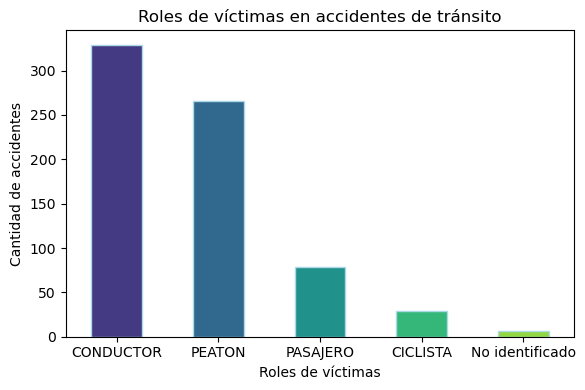

In [320]:
import seaborn as sns

# Calculé el conteo de roles de víctimas
rolVictimas = dfConsolidadoAccidentes["ROL"].value_counts()
roles = rolVictimas

# Grafiqué el top 3 de roles de víctimas con la paleta de colores "viridis"
plt.figure(figsize=(6, 4))
colores = sns.color_palette("viridis", len(roles))
roles.plot(kind="bar", edgecolor="lightblue", color=colores)
plt.xlabel("Roles de víctimas")
plt.ylabel("Cantidad de accidentes")
plt.title("Roles de víctimas en accidentes de tránsito")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### Puedo concluir que los conductores y los peatones son los que más víctimas fatales aportaron a nuestra estadística, mientras que los ciclistas son los que menos fallecen en las vías, lo cual es un dato positivo del cual se podría investigar la razón. Esta información establece roles objetivos en los que se deben enfocar más campañas de concientización de seguridad y prevención vial.

## Cantidad de victimas por accidente

#### Después de haber identificado plenamente el rango de edad, su composición por sexo y su rol dentro de los incidentes, es crucial conocer cuántos fallecidos resultan de cada accidente. Esta información se proporciona en la columna 'N_VICTIMAS'.

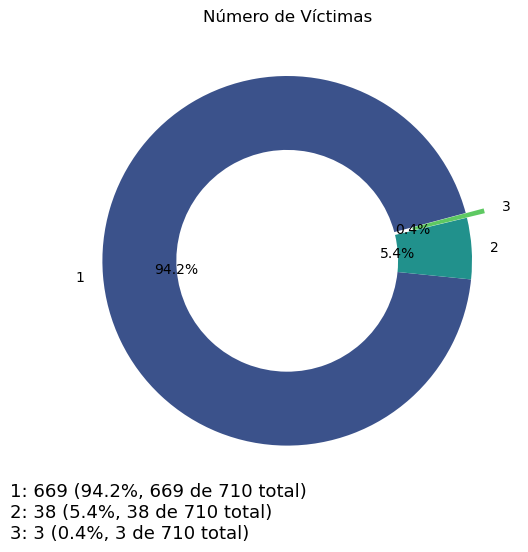

In [321]:
# Calculé el conteo de víctimas por número de víctimas
valores = dfConsolidadoAccidentes["N_VICTIMAS"].value_counts()
porcentajes = valores / len(dfConsolidadoAccidentes) * 100

# Definí los colores utilizando la paleta de colores "viridis"
colors = sns.color_palette("viridis", len(valores))

# Agregué un espacio entre los dos valores menores para mejorar la visualización
explode = (0, 0, 0.1)

plt.figure(figsize=(6, 6))
grafico, texto, autotexto = plt.pie(porcentajes, labels=valores.index, autopct="%.1f%%", startangle=15, colors=colors, explode=explode, wedgeprops=dict(width=0.4))

# Totalicé la cantidad de cada categoría
total_victimas = valores.sum()
conteoPorValor = [f"{index}: {value} ({porcentajes[index]:.1f}%, {value} de {total_victimas} total)" for index, value in valores.items()]
plt.text(-1.5, -1.5, '\n'.join(conteoPorValor), fontsize=13)

plt.title("Número de Víctimas")
plt.show()



#### Con una diferencia notable, la mayoría de los accidentes de tránsito reportan una sola víctima por evento. Esta observación plantea varias preguntas importantes: ¿reciben las víctimas auxilio inmediato? ¿En qué horas ocurre esta accidentalidad? ¿Son las víctimas culpables (actores viales imprudentes) o simplemente víctimas? Abordaré estas preguntas a continuación.

## Accidentes por Victima y Victimario

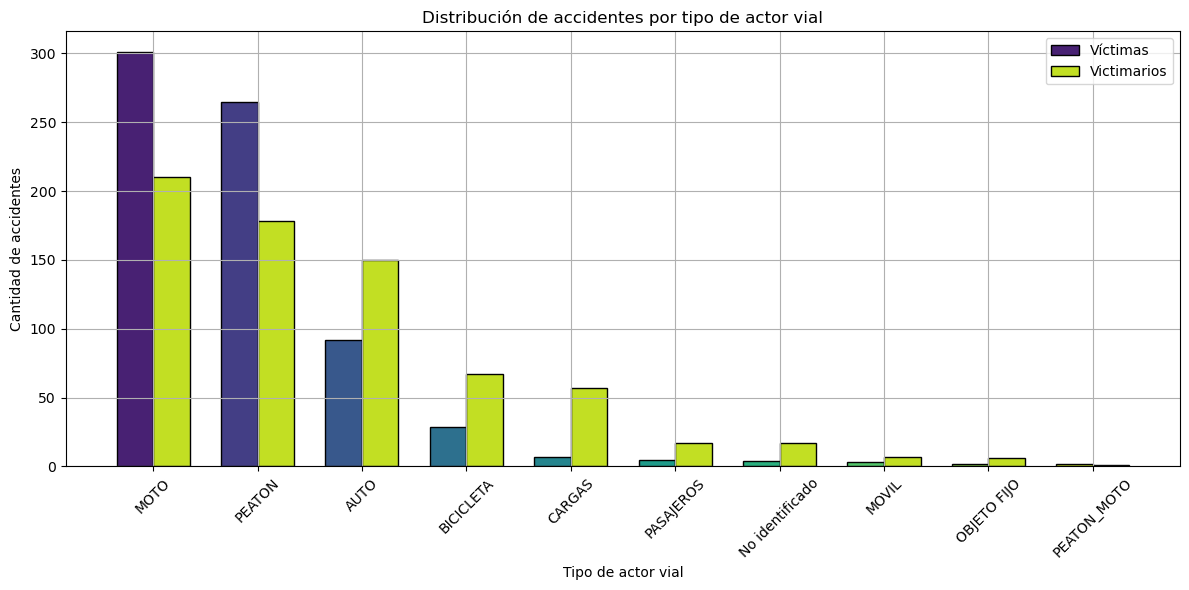

In [322]:
# Obtuve la cantidad de víctimas por tipo de víctima
victimas = dfConsolidadoAccidentes["VICTIMA_x"].value_counts()

# Obtuve la cantidad de responsables por tipo de acusado
victimario = dfConsolidadoAccidentes["ACUSADO"].value_counts()

# Creé la figura y los ejes del gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Definí la paleta de colores "viridis"
colores = sns.color_palette("viridis", len(victimas))

# Anchura de las barras
width = 0.35

# Posiciones de las barras
x = range(len(victimas))

# Grafiqué las barras de víctimas utilizando la paleta "viridis"
barsVictimas = ax.bar(x, victimas, width, label='Víctimas', color=colores, edgecolor='black')

# Definí el verde de la paleta "viridis"
verde_viridis = colores[9]  # Verde en la paleta "viridis"

# Grafiqué las barras de victimarios utilizando el verde de la paleta "viridis"
barsVictimario = ax.bar([i + width for i in x], victimario, width, label='Victimarios', color=verde_viridis, edgecolor='black')

# Etiquetas y título
ax.set_xlabel("Tipo de actor vial")
ax.set_ylabel("Cantidad de accidentes")
ax.set_title("Distribución de accidentes por tipo de actor vial")
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(victimas.index, rotation=45)
ax.legend()

# Mostré el gráfico
plt.grid(True, zorder=1)
plt.tight_layout()
plt.show()



#### Encontre valores atipicos que pueden afectar futuras visualizaciones , averiguare sus porcentajes y decidire que hacer con ellos.

In [323]:
# Crear una lista de índices únicos combinando los índices de acusados y víctimas
indices_unicos = list(set(acusados.index) | set(victimas.index))

# Crear el diccionario de datos con las listas de la misma longitud
data = {
    'Actor Vial': indices_unicos,
    'Porcentaje Acusados': [acusados.get(actor, 0) / acusados.sum() * 100 for actor in indices_unicos],
    'Porcentaje Víctimas': [victimas.get(actor, 0) / victimas.sum() * 100 for actor in indices_unicos]
}

# Crear el DataFrame
df_porcentajes = pd.DataFrame(data)

# Formatear los porcentajes a dos decimales
df_porcentajes['Porcentaje Acusados'] = df_porcentajes['Porcentaje Acusados'].apply(lambda x: f"{x:.2f}%")
df_porcentajes['Porcentaje Víctimas'] = df_porcentajes['Porcentaje Víctimas'].apply(lambda x: f"{x:.2f}%")

# Mostrar el DataFrame
print(df_porcentajes)


         Actor Vial Porcentaje Acusados Porcentaje Víctimas
0   No identificado               2.39%               0.56%
1            PEATON               0.00%              37.32%
2       OBJETO FIJO               9.44%               0.28%
3              OTRO               0.85%               0.00%
4            CARGAS              21.13%               0.99%
5              MOTO               8.03%              42.39%
6       PEATON_MOTO               0.00%               0.28%
7              AUTO              29.58%              12.96%
8         PASAJEROS              25.07%               0.70%
9         BICICLETA               0.99%               4.08%
10             TREN               0.14%               0.00%
11         MULTIPLE               2.39%               0.00%
12            MOVIL               0.00%               0.42%


#### Con esta informacion descarto el concepto de 'victima culpable' previamente mencionado pues PEATON en ACUSADOS tienen una participacion de 0.0% , ademas resalta a primera vista el actor vial 'No identificado' con partcipacion  en ACUSADOS del 2.39 % se pueden etiquetar como 'autos fantasmas' los cuales dejan a la victima abandonada, tambien se puede etiquetar como choques la PARTICIPACION  DE OBJETO FIJO en ACUSADO y para finalizar los actores viales PEATON_MOTO  junto a MOVIL, TREN , OTRO, MULTIPLE  que no son actores viales  claros y tienen un porcentaje muy bajo las eliminare.

In [324]:
# Eliminar los valores específicos de las columnas ACUSADO y VICTIMA_x
dfConsolidadoAccidentes = dfConsolidadoAccidentes[~dfConsolidadoAccidentes['ACUSADO'].isin(['PEATON_MOTO', 'MOVIL', 'TREN', 'OTRO', 'MULTIPLE'])]
dfConsolidadoAccidentes = dfConsolidadoAccidentes[~dfConsolidadoAccidentes['VICTIMA_x'].isin(['PEATON_MOTO', 'MOVIL', 'TREN', 'OTRO', 'MULTIPLE','OBJETO FIJO'])]


## Continuando con la grafica .... 

#### Quise graficar de una manera sencilla quiénes mueren más, si el conductor o el peatón, así como qué tipo de conductores están más involucrados en accidentes fatales y el comportamiento de los demás actores viales.

#### Sin duda alguna, las motos y los peatones, los actores viales más desprotegidos, son los que más mueren. Deben ser los primeros objetivos en las campañas de concientización vial. Cabe destacar el buen comportamiento de los ciclistas, teniendo en cuenta que la Ciudad de Buenos Aires cuenta actualmente con una red de 300 kilómetros de Ciclovías y Bicisendas. Esta red soporta el 7% de la movilidad, con más de 400 mil viajes diarios. Según [buenosaires.gob.ar](https://buenosaires.gob.ar/pedalea-la-ciudad).


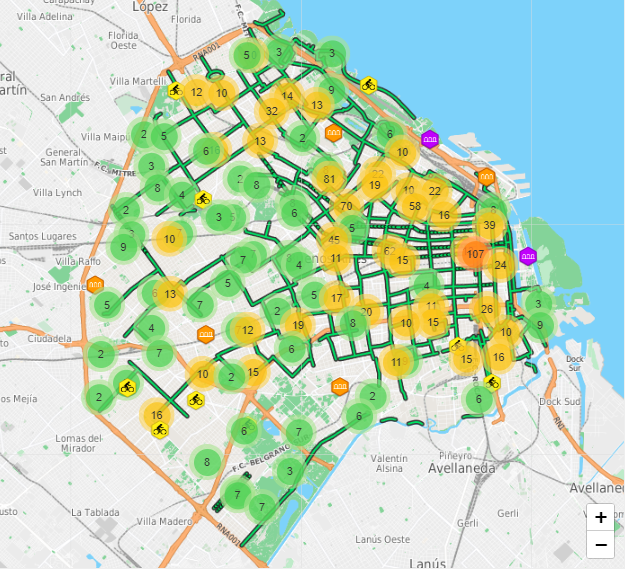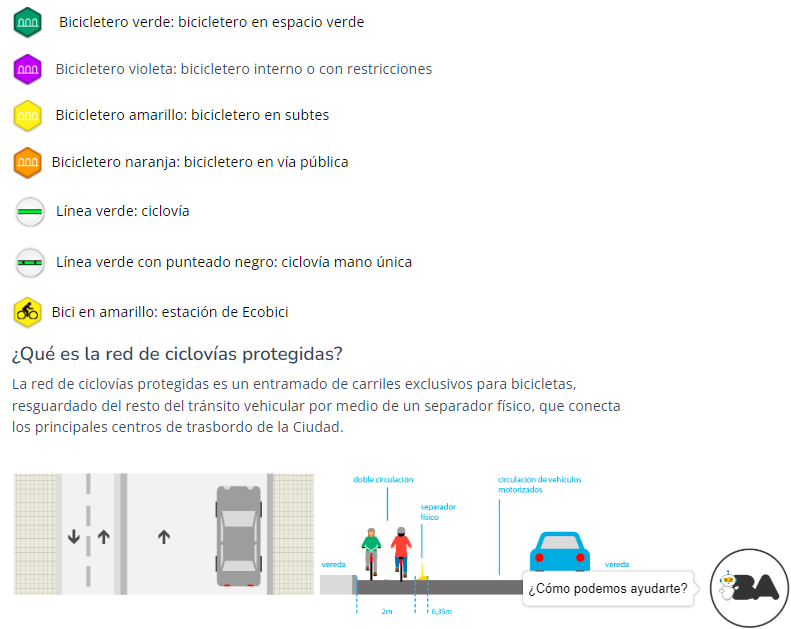

## Accidentalidad por horas

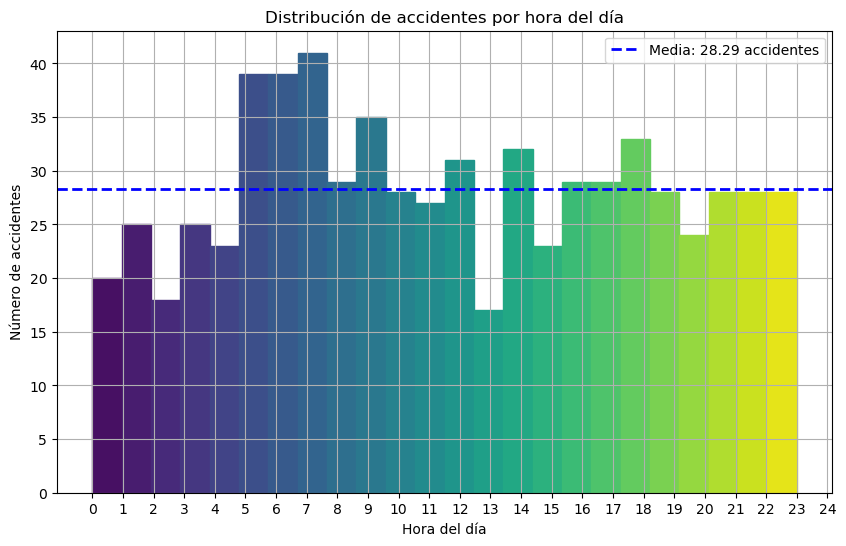

In [325]:
# Convertí la fecha fija a tipo datetime
fechaFija = pd.to_datetime('2024-01-01')

# Convertí la columna "HORA" a tipo timedelta
horasTimedelta = pd.to_timedelta(dfConsolidadoAccidentes["HORA"].astype(str))

# Sumé la hora timedelta a la fecha fija para formar un objeto datetime completo
dfConsolidadoAccidentes["FECHA_COMPLETA"] = fechaFija + horasTimedelta

# Convertí la columna de hora a tipo datetime
dfConsolidadoAccidentes["FECHA_COMPLETA"] = pd.to_datetime(dfConsolidadoAccidentes["FECHA_COMPLETA"])
horas = dfConsolidadoAccidentes["FECHA_COMPLETA"].dt.hour

# Definí la paleta de colores "viridis" con un degradado
colores = sns.color_palette("viridis", n_colors=24)

plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(horas, bins=24, edgecolor="black", color=colores[0])  # Especifiqué un color inicial

# Calculé la media de accidentes
media_accidentes = counts.mean()

# Cambié el color de cada barra utilizando la paleta "viridis" con un degradado
for i in range(len(counts)):
    plt.gca().get_children()[i].set_color(colores[i])  # Utilicé la paleta "viridis" con un degradado

# Agregué la línea horizontal para la media de accidentes
plt.axhline(y=media_accidentes, color='blue', linestyle='--', linewidth=2, label=f'Media: {media_accidentes:.2f} accidentes')

plt.xlabel("Hora del día")
plt.ylabel("Número de accidentes")
plt.title("Distribución de accidentes por hora del día")
plt.xticks(range(0, 25))
plt.grid(True, zorder=1)
plt.legend()  # Mostré la leyenda
plt.show()


#### En cada hora del día ocurren al menos 20 accidentes (excepto de 2 a 3 am y de 12:30 a 1:30 pm), siendo las horas pico de la mañana (5 am - 8 am) seguido de toda la misma franja horaria la que más accidentes reporta. Se observa un aumento agresivo entre la 1 am y las 2 am, seguido de un decrecimiento similar entre las 12 pm y las 2 pm.

## Accidentalidad por tipo de calle

#### En la columna tipo de calle encontre cuatro tipos de calle 'AVENIDA', 'CALLE', 'GRAL PAZ' Y 'AUTOPISTA', me llama la atencion que se diferencie 'GRAL PAZ' 



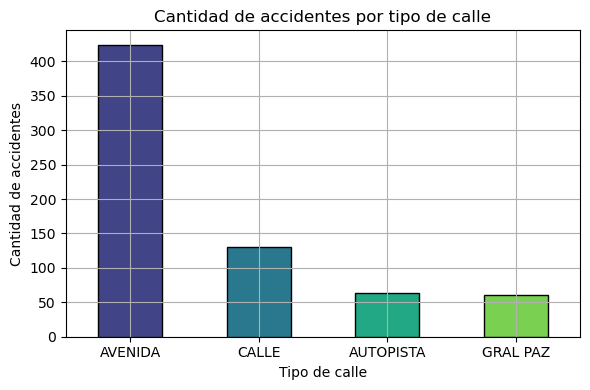

In [326]:
porTipoDeCalle= dfConsolidadoAccidentes["TIPO_DE_CALLE"].value_counts()
# Definí la paleta de colores "viridis"
colores_viridis = sns.color_palette("viridis", len(porTipoDeCalle))

# Grafiqué la cantidad de accidentes por tipo de calle utilizando la paleta "viridis"
plt.figure(figsize=(6, 4))
porTipoDeCalle.plot(kind="bar", edgecolor="black", color=colores_viridis)
plt.xlabel("Tipo de calle")
plt.ylabel("Cantidad de accidentes")
plt.title("Cantidad de accidentes por tipo de calle")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid()

plt.show()



#### La Avenida General Paz es una autopista de 24,3 km de extensión en la Ciudad Autónoma de Buenos Aires, Argentina. Es utilizada mayoritariamente como vía de acceso a la Ciudad de Buenos Aires por los habitantes de la zona norte y oeste del Gran Buenos Aires. Aporta la misma cantidad de accidentes que todas las demás autopistas juntas, razón por la cual decidí mantenerla diferenciada en este punto del analsis mas adelante se puede unificar.

#### La principal conclusión es que en las avenidas es donde más víctimas fatales se están presentando. Sería necesario revisar el estado de las avenidas, la velocidad máxima permitida, la cantidad de puentes, la cantidad de semáforos, entre otros factores, para analizar esta gráfica en detalle.

Accidenta

## Accidentalidad por comunas

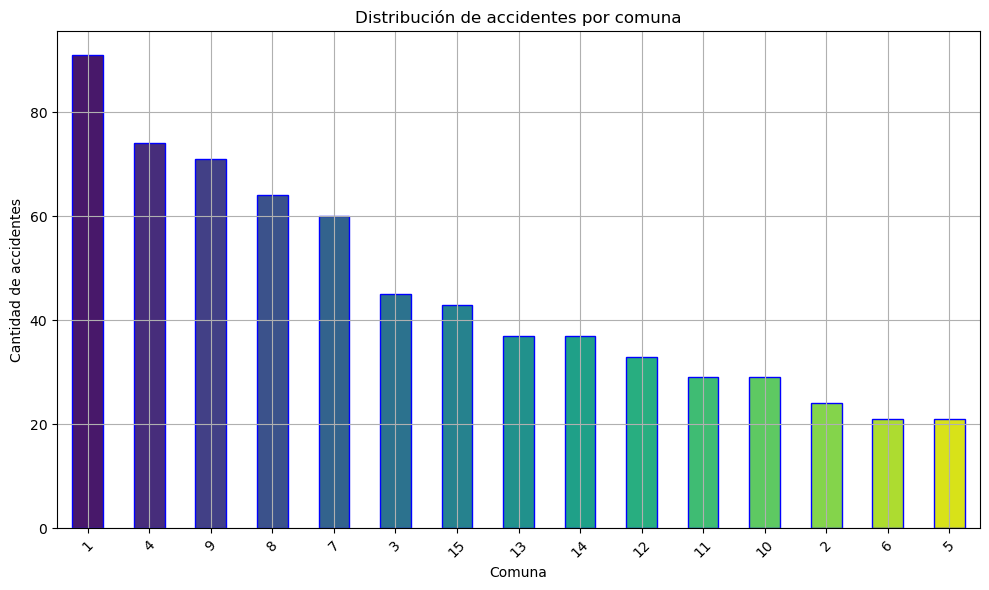

In [327]:
porComuna = dfConsolidadoAccidentes["COMUNA"].value_counts()
# Definí la paleta de colores "viridis"
colores_viridis = sns.color_palette("viridis", len(porComuna))

# Grafiqué la distribución de accidentes por comuna utilizando la paleta "viridis"
plt.figure(figsize=(10, 6))
porComuna.plot(kind="bar", color=colores_viridis, edgecolor="blue")
plt.xlabel("Comuna")
plt.ylabel("Cantidad de accidentes")
plt.title("Distribución de accidentes por comuna")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()


#### Indiscutiblemente, las comunas 1, 4, 9, 8 y 7 tienen la mayor concentración de accidentes, razón por la cual es necesario visualizar su ubicación en el mapa.

In [328]:
# Convertir las columnas 'pos_x' y 'pos_y' a tipo float para representar las coordenadas en el mapa
dfConsolidadoAccidentes['pos x'] = pd.to_numeric(dfConsolidadoAccidentes['pos x'], errors='coerce')
dfConsolidadoAccidentes['pos y'] = pd.to_numeric(dfConsolidadoAccidentes['pos y'], errors='coerce')

In [329]:
# Convertí las coordenadas en geometrías de puntos
dfConsolidadoAccidentes['pos x'] = dfConsolidadoAccidentes['pos x'].astype(float)
dfConsolidadoAccidentes['pos y'] = dfConsolidadoAccidentes['pos y'].astype(float)

# Cree geometrías de puntos a partir de las coordenadas
geometry = [Point(x, y) for x, y in zip(dfConsolidadoAccidentes['pos x'], dfConsolidadoAccidentes['pos y'])]

# Cree un GeoDataFrame con las geometrías de puntos
gdf = gpd.GeoDataFrame(dfConsolidadoAccidentes, geometry=geometry)

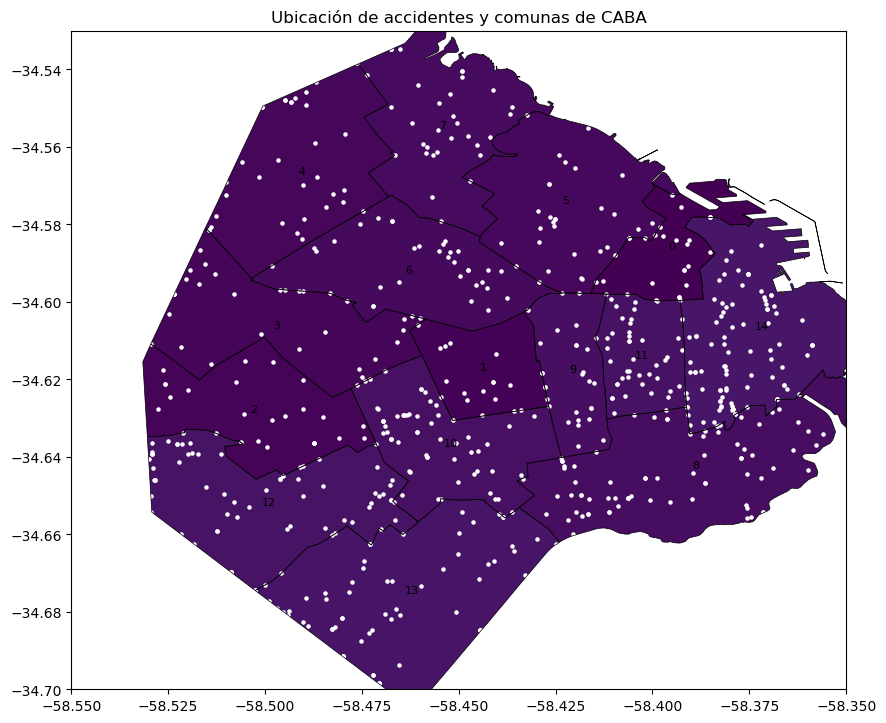

In [330]:
# Cargue los datos de las comunas de CABA
url = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/comunas/comunas.geojson"
comunas = gpd.read_file(url)

# Asignar un color a cada comuna utilizando la paleta viridis
num_comunas = len(comunas)
colores_comunas = plt.cm.viridis(range(num_comunas))

# Crear el mapa base de CABA
fig, ax = plt.subplots(figsize=(10, 10))
comunas.boundary.plot(ax=ax, color='black', linewidth=0.5)  # Enmarcar las comunas

# Graficar los polígonos de cada comuna con un color diferente
for i in range(num_comunas):
    comunas[comunas.index == i].plot(ax=ax, color=colores_comunas[i])
    # Obtener el centroide de la comuna y agregar el número de comuna como texto
    centroid = comunas[comunas.index == i].geometry.centroid.values[0]
    ax.text(centroid.x, centroid.y, str(i), fontsize=8, ha='center', va='center')

# Añadir los puntos blancos
gdf.plot(ax=ax, color='white', markersize=5)

# Ajustar los límites del mapa para centrarse en CABA
ax.set_xlim([-58.55, -58.35])  # Ajustar los límites longitudinales
ax.set_ylim([-34.70, -34.53])  # Ajustar los límites latitudinales

# Añadir título y leyenda
plt.title('Ubicación de accidentes y comunas de CABA')

# Mostrar el mapa
plt.show()


#### Se ratifica la cercanía en las comunas 1 y 9, así como la cercanía de las comunas 4 y 7, en las cuales se debería realizar un trabajo diferencial. También se puede identificar claramente la línea marcada por los accidentes en la AV GRAL PAZ (Linea Roja).
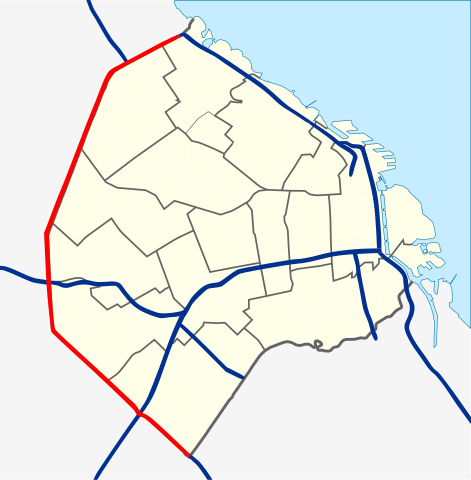




## Conclusiones

#### El análisis exploratorio revela cifras contundentes en el número de víctimas por accidente, con mayor incidencia de accidentes con una sola víctima. 

#### Los picos en la accidentalidad por horas sugieren la necesidad de medidas preventivas específicas en momentos clave del día (AM). 

#### La variación en la frecuencia de accidentes según el tipo de calles señala áreas que podrían requerir mejoras en la infraestructura vial.

#### La distribución geográfica de la accidentalidad por comunas muestra disparidades significativas, destacando áreas que necesitan mayor atención en seguridad vial y programas educativos.

#### Los patrones diferenciales en las víctimas y responsables, así como en los rangos de edad, resaltan la importancia de abordar los factores de riesgo asociados con mayor precisión.

#### Estos hallazgos ofrecen una base sólida para orientar estrategias de prevención de accidentes y mejorar la seguridad vial en áreas específicas, incluyendo la Avenida General Paz y las comunas 1, 4, 7 y 9, que muestran una mayor incidencia de accidentes y requieren intervenciones diferenciadas.

En el ETL.ipynb buscare enriquecer los datos y ir perfilandolos para la obtención de los dos KPI's propuestos y el planteamiento de un tercero.

## Preprocesamiento adicional para el dashboard desarrollado en streamlit

#### Sin duda alguna python como herramienta potentisima para cualquier tipo de tratamiento con los datos (junto a sus frameworks y librerias) empalma perfectamente con  un entorno de visualizacion igualmente potente e interactivo llamado streamlit, despues de leer parte de su documentacion, ver sus graficos y forma de crearlos y deplegarlos , tomo la decision de realizar transformaciones extras a los datos para crear graficos mas contundentes.

In [331]:
# Convertir la columna 'HORA' a formato datetime
dfConsolidadoAccidentes['HORA'] = pd.to_datetime(dfConsolidadoAccidentes['HORA'], format='%H:%M:%S')

# Lista de franjas horarias
franjasHorarias = ['00:00 - 03:59', '04:00 - 07:59', '08:00 - 11:59', '12:00 - 15:59', '16:00 - 19:59', '20:00 - 23:59']

# Definir los límites de las franjas horarias
limites_franjas = [0, 4, 8, 12, 16, 20, 24]

# Crear la columna 'FRANJA_HORARIA'
dfConsolidadoAccidentes['FRANJA_HORARIA'] = pd.cut(dfConsolidadoAccidentes['HORA'].dt.hour, bins=limites_franjas, labels=franjasHorarias)


In [332]:
# Convertir la columna 'FECHA' a formato datetime si no lo está
dfConsolidadoAccidentes['FECHA'] = pd.to_datetime(dfConsolidadoAccidentes['FECHA'])

# Crear la columna 'DIA_SEMANA' con nombres de días de la semana en español
dias_semana_espanol = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
dfConsolidadoAccidentes['DIA_SEMANA'] = dfConsolidadoAccidentes['FECHA'].dt.day_name().map(dias_semana_espanol)


In [333]:
# Creamos la columna "mes"
dfConsolidadoAccidentes['MES'] = dfConsolidadoAccidentes['FECHA'].dt.month

In [334]:
# Disponibilizo los datos para enriquecerlos en el ETL
dfConsolidadoAccidentes.to_csv("./DataFrames/consolidadoAccidentes.csv", index=False)

In [335]:
# Mostrar el DataFrame resultante
dfConsolidadoAccidentes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 679 entries, 0 to 716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   679 non-null    object        
 1   N_VICTIMAS           679 non-null    int64         
 2   FECHA                679 non-null    datetime64[ns]
 3   HORA                 679 non-null    datetime64[ns]
 4   LUGAR_DEL_HECHO      679 non-null    object        
 5   TIPO_DE_CALLE        679 non-null    object        
 6   COMUNA               679 non-null    int64         
 7   pos x                668 non-null    float64       
 8   pos y                668 non-null    float64       
 9   PARTICIPANTES        679 non-null    object        
 10  VICTIMA_x            679 non-null    object        
 11  ACUSADO              679 non-null    object        
 12  AÑO                  679 non-null    int32         
 13  ROL                  679 non-null    obj